In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
plt.rcParams['font.family'] = 'New Gulim'
df = pd.read_csv('finalproject1.csv',encoding='cp949')
df.head()

,품목 중분류,단위,시도,기준일,당일 가격,1개월 전 가격,1년 전 가격,평년 가격
0,쌀,20KG,서울,20211109,52500,55000,54360,44567
1,쌀,20KG,부산,20211109,54000,56000,58800,45000
2,쌀,20KG,대구,20211109,56000,58600,56400,46667
3,쌀,20KG,광주,20211109,52300,56000,53700,44400
4,쌀,20KG,대전,20211109,54600,58100,54000,44833


In [141]:
df_sort = df.groupby('품목 중분류')
df_sort.size()

품목 중분류
갈치          7
감귤         10
감자          8
건고추        17
건멸치         5
건미역         5
고구마         8
고등어        12
깐마늘(국산)    10
깻잎          8
녹두         10
느타리버섯       8
당근         12
들깨         11
땅콩         10
레몬          8
망고          8
메밀          1
멜론          8
명태          4
무           2
물오징어        8
미나리         8
바나나         8
방울토마토       2
배          16
배추          6
붉은고추        8
상추         16
새송이버섯       8
새우          4
생강         12
시금치         8
쌀          10
양배추         8
양파          8
얼갈이배추       8
열무          8
오이          4
전복          4
참깨         16
참다래        12
찹쌀         10
콩          12
토마토         8
파          16
파인애플        8
파프리카        8
팥          12
팽이버섯        8
포도         16
풋고추        22
피마늘        12
피망          8
호박          8
dtype: int64

In [142]:
df_mandal = df_sort.get_group('감귤')
df_mandal.head(10)


,품목 중분류,단위,시도,기준일,당일 가격,1개월 전 가격,1년 전 가격,평년 가격
399,감귤,10KG,서울,20180105,26000,20000,19800,19050
400,감귤,10KG,부산,20180105,23000,20000,19000,18000
401,감귤,10KG,대구,20180105,20000,23000,19000,18133
402,감귤,10KG,광주,20180105,20000,22600,20400,19467
403,감귤,10KG,대전,20180105,21000,21000,21600,17783
404,감귤,10KG,서울,20180105,21000,14000,16800,16050
405,감귤,10KG,부산,20180105,19000,16000,17000,14167
406,감귤,10KG,대구,20180105,15000,18000,15000,14400
407,감귤,10KG,광주,20180105,15000,17600,16400,15500
408,감귤,10KG,대전,20180105,18000,18000,17800,13850


In [229]:
df_mandal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 399 to 408
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   품목 중분류    10 non-null     object
 1   단위        10 non-null     object
 2   시도        10 non-null     object
 3   기준일       10 non-null     int64 
 4   당일 가격     10 non-null     int64 
 5   1개월 전 가격  10 non-null     int64 
 6   1년 전 가격   10 non-null     int64 
 7   평년 가격     10 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 720.0+ bytes


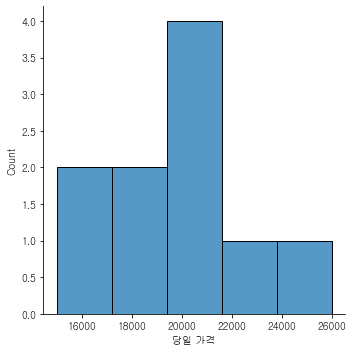

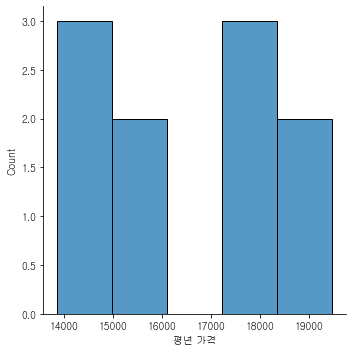

In [143]:
sns.displot(df_mandal['당일 가격'])
sns.displot(df_mandal['평년 가격'])


Text(0, 0.5, '')

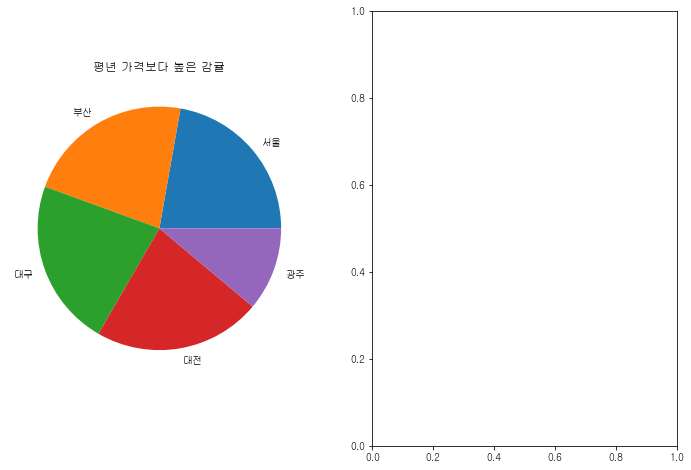

In [144]:
f, ax = plt.subplots(1,2,figsize=(12, 8))
df_mandal['시도'][df_mandal['당일 가격'] > df_mandal['평년 가격']].value_counts().plot(kind='pie', ax=ax[0])
ax[0].set_title('평년 가격보다 높은 감귤')
ax[0].set_ylabel('')


In [203]:
Y = df_mandal['당일 가격']
X = df_mandal.drop(['당일 가격','단위','시도','품목 중분류','기준일'], axis=1, inplace=False)

In [204]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.6, random_state=0)

In [205]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [206]:
Y_predict = lr.predict(X_test)

In [216]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print(r2_score(Y_test, Y_predict))
print('MSE:', mse)
print('RMSE:', rmse)

0.70346403588552
MSE: 4522173.452745819
RMSE: 2126.5402542030142


In [208]:
print(lr.coef_)
print(lr.intercept_)
print(np.round(lr.coef_, 2))

[-0.44916432  0.85548663  0.82608513]
-1225.4127152139808
[-0.45  0.86  0.83]


In [210]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X_train.columns)
coef.sort_values(ascending=False)

1년 전 가격     0.86
평년 가격       0.83
1개월 전 가격   -0.45
dtype: float64

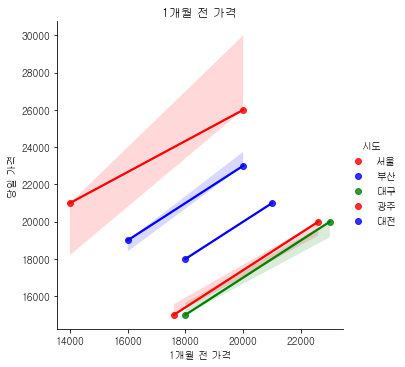

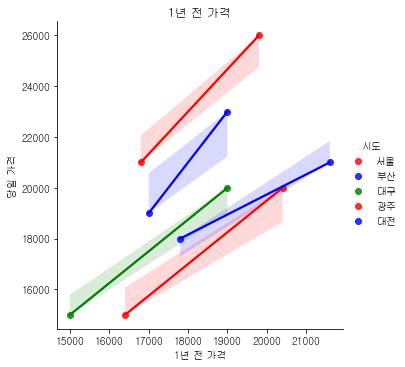

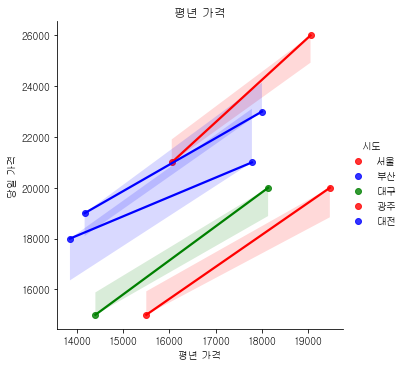

In [227]:
x_features = X_train.columns
plot_color = ['red', 'blue', 'green']
for i in range(len(x_features)):
    sns.lmplot(x=x_features[i], y='당일 가격', data=df_mandal, fit_reg=True, hue='시도', palette=plot_color)
    plt.title(x_features[i])
    plt.show()


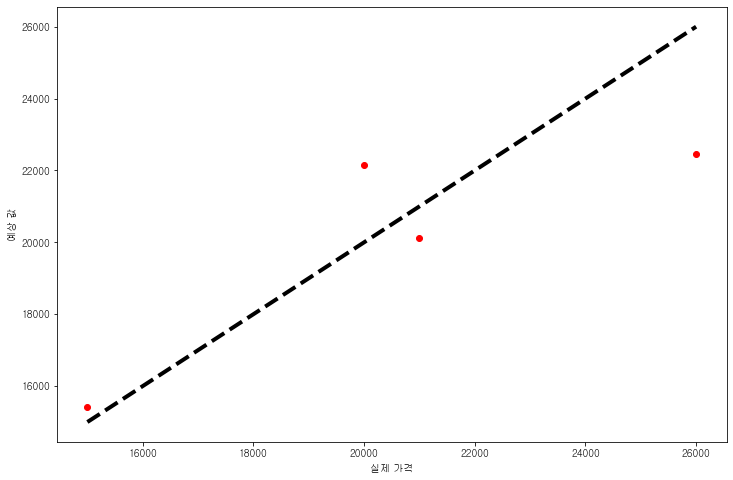

In [231]:
plt.figure(figsize=(12, 8))
plt.scatter(Y_test, Y_predict, color='red')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.xlabel('실제 가격')
plt.ylabel('예상 값')
plt.show()